In [0]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def softmax(x):
    # x has shape [batch_size, n_classes]
    e = np.exp(x)
    n = np.sum(e, 1, keepdims=True)
    return e/n

# Load data

In [0]:
# "integer -> word" decoder 
decoder = np.load('decoder.npy',allow_pickle=True)[()]

# for restoring document ids, "id used while training -> initial id"
doc_decoder = np.load('doc_decoder.npy',allow_pickle=True)[()]

In [0]:
# original document categories

targets=torch.zeros([data.shape[0]])
for i in range(len(BF_fake)):
  targets[i]=1
target_names = ['0','1']

targets = np.array([targets[doc_decoder[i]] for i in range(len(doc_decoder))])

# Load the trained model


In [1]:
state = torch.load('model_state.pytorch', map_location=lambda storage, loc: storage)
n_topics = 6
doc_weights = state['doc_weights.weight'].cpu().clone().numpy()
topic_vectors = state['topics.topic_vectors'].cpu().clone().numpy()
resulted_word_vectors = state['neg.embedding.weight'].cpu().clone().numpy()

# distribution over the topics for each document
topic_dist = softmax(doc_weights)

# vector representation of the documents
doc_vecs = np.matmul(topic_dist, topic_vectors)
topic_dist.shape

# Show topics

In [0]:
similarity = np.matmul(topic_vectors, resulted_word_vectors.T)
most_similar = similarity.argsort(axis=1)[:, -10:]

for j in range(n_topics):
    topic_words = ' '.join([decoder[i] for i in reversed(most_similar[j])])
    print('topic', j + 1, ':', topic_words)

topic 1 : work news rockford bill police united good surrogate york liberal
topic 2 : news michelle american find suspect north united york absolutely police
topic 3 : police american news spin voter search way family affair arpaio
topic 4 : percent news black woman find house thing way happen american
topic 5 : depp news take god woman liberal anger thing family removal
topic 6 : arpaio house bid woman michelle defense right america thing talk


# Show learned document embeddings

In [0]:
from mpl_toolkits.mplot3d import Axes3D

def plot(X):
    # X has shape [n_documents, 2]
    
    # fig = plt.figure(figsize=(8, 5), dpi=120);
    plt.figure(figsize=(8, 5), dpi=120);
    # ax = Axes3D(fig)
    cmap = plt.cm.tab20
    number_of_targets = 2
    
    for i in range(number_of_targets):
        
        label = target_names[i]
        # size = 15.0
        linewidths = 1
        edgecolors = 'k'
        color = cmap(i)
  
        
        if '0' in label:
            marker = 'v'
            size = 8.0
            linewidths = 1
            edgecolors = 'r'
        else:
            marker = 'o'
            size = 8.0
            edgecolors = 'g'
            
            
        plt.scatter(
            X[targets == i, 0], 
            X[targets == i, 1], 
            s=size, c=color, marker=marker,
            linewidths=linewidths, edgecolors=edgecolors,
            label=label
        )
        
    
    leg = plt.legend()
    leg.get_frame().set_alpha(0.3)

In [ ]:
# !pip install MulticoreTSNE
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(perplexity=200, n_jobs=4, random_state=2020)
X = tsne.fit_transform(doc_vecs.astype('float64'))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


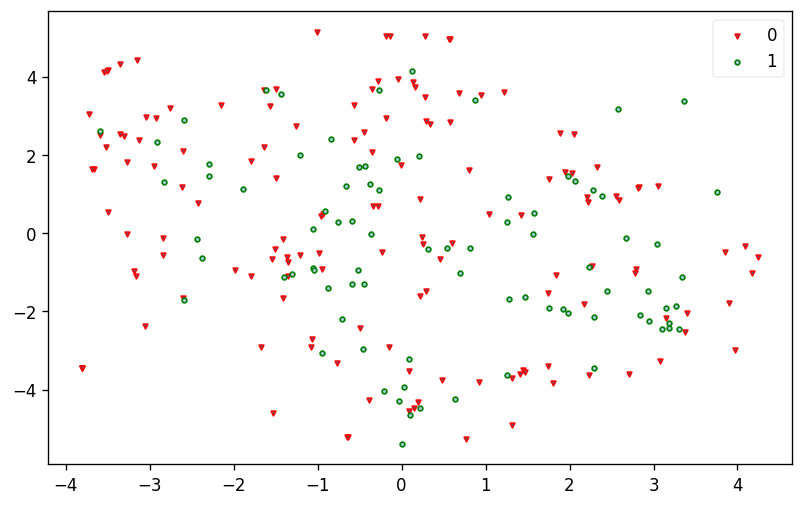

In [0]:
plot(X) # learned document vectors

# Show initial document weights (vanilla lda)

In [0]:
doc_weights_init = np.load('doc_weights_init.npy')

In [0]:
tsne = TSNE(perplexity=200, n_jobs=4, random_state=2020)
Y = tsne.fit_transform(doc_weights_init.astype('float64'))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


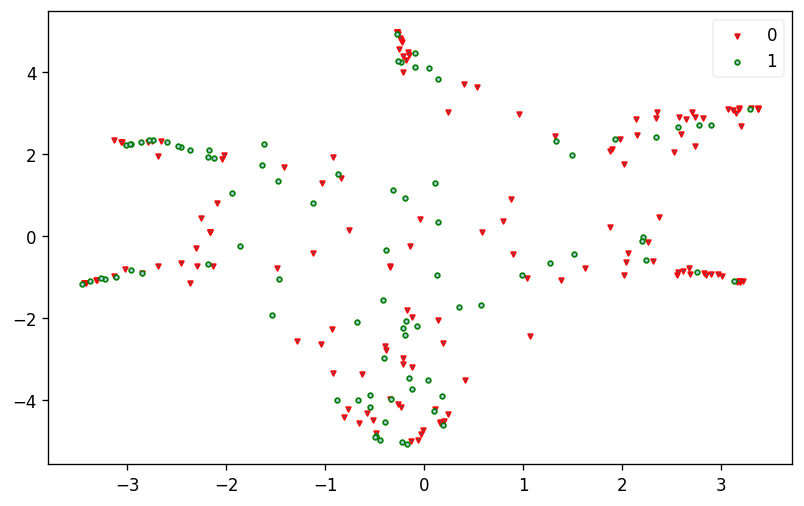

In [0]:
plot(Y)  # distribution over the topics for each document (output of LDA)

# Explore learned topic distribution

In [0]:
tsne = TSNE(perplexity=200, n_jobs=4, random_state=2020)
Z = tsne.fit_transform(topic_dist.astype('float64'))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


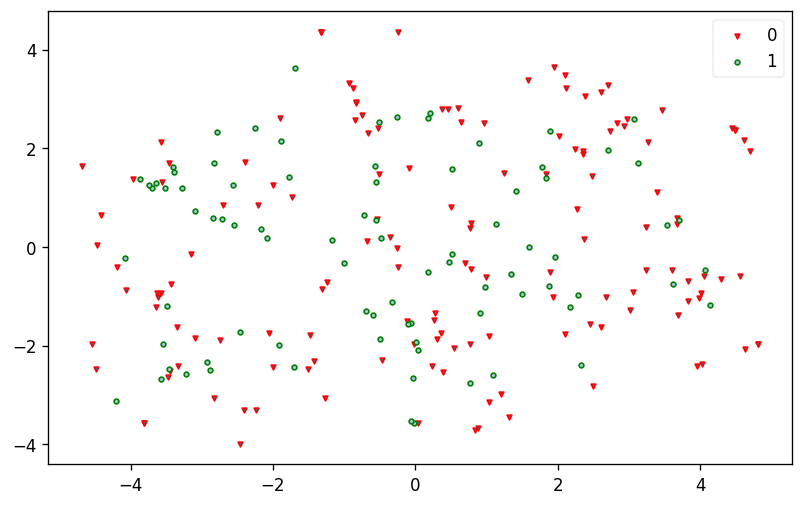

In [0]:
plot(Z)#learned distribution over the topics for each document

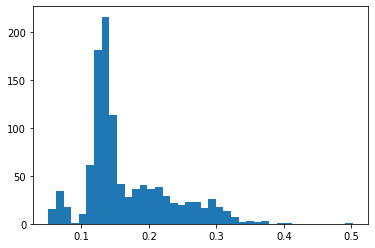

In [0]:
# distribution of nonzero probabilities
dist = topic_dist.reshape(-1)
plt.hist(dist[dist > 0.01], bins=40);

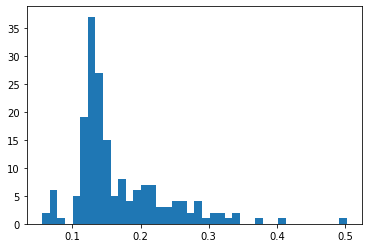

In [0]:
# distribution of probabilities for some random topic
plt.hist(topic_dist[:, n_topics-1], bins=40);

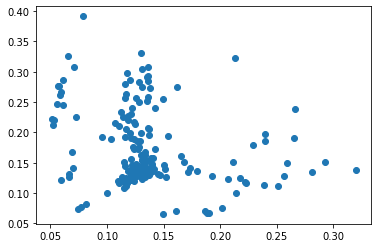

In [0]:
# topic assignments for two random topics
plt.scatter(topic_dist[:, 0], topic_dist[:, 1]);

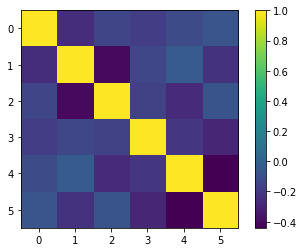

In [0]:
# correlation of topic assignments
corr = np.corrcoef(topic_dist.transpose(1, 0))
plt.imshow(corr);
plt.colorbar();

# Show a document and its topics

In [0]:
i = 177 # document id

print('DOCUMENT:')
print([doc for j, doc in docs if j == doc_decoder[i]][0], '\n')

print('DISTRIBUTION OVER TOPICS:')
s = ''
for j, p in enumerate(topic_dist[i], 1):
    s += '{0}:{1:.3f}  '.format(j, p)
    if j%6 == 0:
        s += '\n'
print(s)

print('\nTOP TOPICS:')
for j in reversed(topic_dist[i].argsort()[-3:]):
    topic_words = ' '.join([decoder[i] for i in reversed(most_similar[j])])
    print('topic', j + 1, ':', topic_words)

DOCUMENT:
Georgia poll: Donald Trump, Hillary Clinton in tight race Story highlights Trump has 45%, Clinton 42% and Gary Johnson 8%

Mitt Romney won the state by 8 points in 2012

Washington (CNN) Donald Trump and Hillary Clinton are in a tight race in in Georgia, a traditionally deep red state, according to a new poll.

The Republican candidate has 45% to Clinton's 42% in the Monmouth University poll, within the poll's margin of error. Libertarian Gary Johnson had the support of 8% of likely voters.

Trump is underperforming previous GOP candidates. Mitt Romney won the state by 8 points in 2012 over President Barack Obama.

The incumbent Republican senator is also out-polling Trump. Sen. Johnny Isakson has a 16-point lead over challenger Jim Barksdale, 50% to 34%.

Clinton's strength comes from the Atlanta area, where she leads Trump 55% to 35%. But Trump leads her 51% to 33% elsewhere in the Peach State. She leads 88% to 4% among the state's black voters, but trails 20% to 66% among 